In [5]:
# Удаленная загрузка набора данных
!wget https://gitlab.com/gamkere-repos/intellegence-system-labs/-/raw/creating-lr-7/lr-7/src/datasets/bank_deposit_train.csv



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://gitlab.com/gamkere-rep]87bank_deposit_train.c  20% [=====>                        ]  751.98K    --.-KB/s87bank_deposit_train.c  64% [==================>           ]    2.28M   12.41MB/s87bank_deposit_train.c 100% [=============================>]    3.53M   11.71MB/s87[Files: 1  Bytes: 3.53M [7.22MB]8

In [6]:
# Встроенные графики в редактор
%matplotlib inline

# Лабораторная работа № 7 - деревья решений

### Подготовительный этап

Для построения и обучения дерева решений будем использовать библиотеку scikit-learn разработанную для языка программирования python. В качестве средства визуализации будет использоваться 

In [7]:
import pandas as pd # Загрузчик данных
import matplotlib.pyplot as plt # Графики

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Модель дерева решений
from sklearn.model_selection import train_test_split # Разбиение данных
from sklearn.preprocessing import LabelEncoder # Кодирование по меткам
from sklearn import metrics # Метрики

### Исследование данных

Датасет представляет собой следующую структуру, объектом является потенциальный клиент услуги по срочному депозиту.

Каждая запись представлена следующим набором свойств:

* age - Возраст клиента (Числовое)
* job - Статус занятости (Категориальное)
* marital - Семейное положени (Категориальное)
* education - Образование (Категориальное)
* default - Наличие просроченного кредита (Категориальное)
* balance - Баланс на счете (Числовое)
* housing - Наличие ипотеки (Категориальное)
* contact - Способ связи с клиентом (phone, cellular, etc.). (Категориальное)
* day - День месяца, когда последний раз была связь. (Числовое)
* duration - Продолжительность последнего контакта (Числовое)
* pdays - Количество дней, прошедшее после послденей компании с предыдущего разговора (Числовое)
* poutcome - Результат предыдущей маркетинговой компании (Категориальное)

In [8]:
# Задаем путь к файлу
dataset_name = 'bank_deposit_train.csv'

In [9]:
# Метки на русском
russian_labels = {
    'age': 'возраст',
    'job': 'работа',
    'martial': 'семейное положение',
    'default': 'дефолт',
    'housing': 'ипотечный кредит',
    'loan': 'кредит',
}

In [10]:
# Смотрим на данные внешне
df = pd.read_csv(dataset_name)
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Построим диаграммы визуализирующие:
* Занятость
* Семейное положение
* Образование

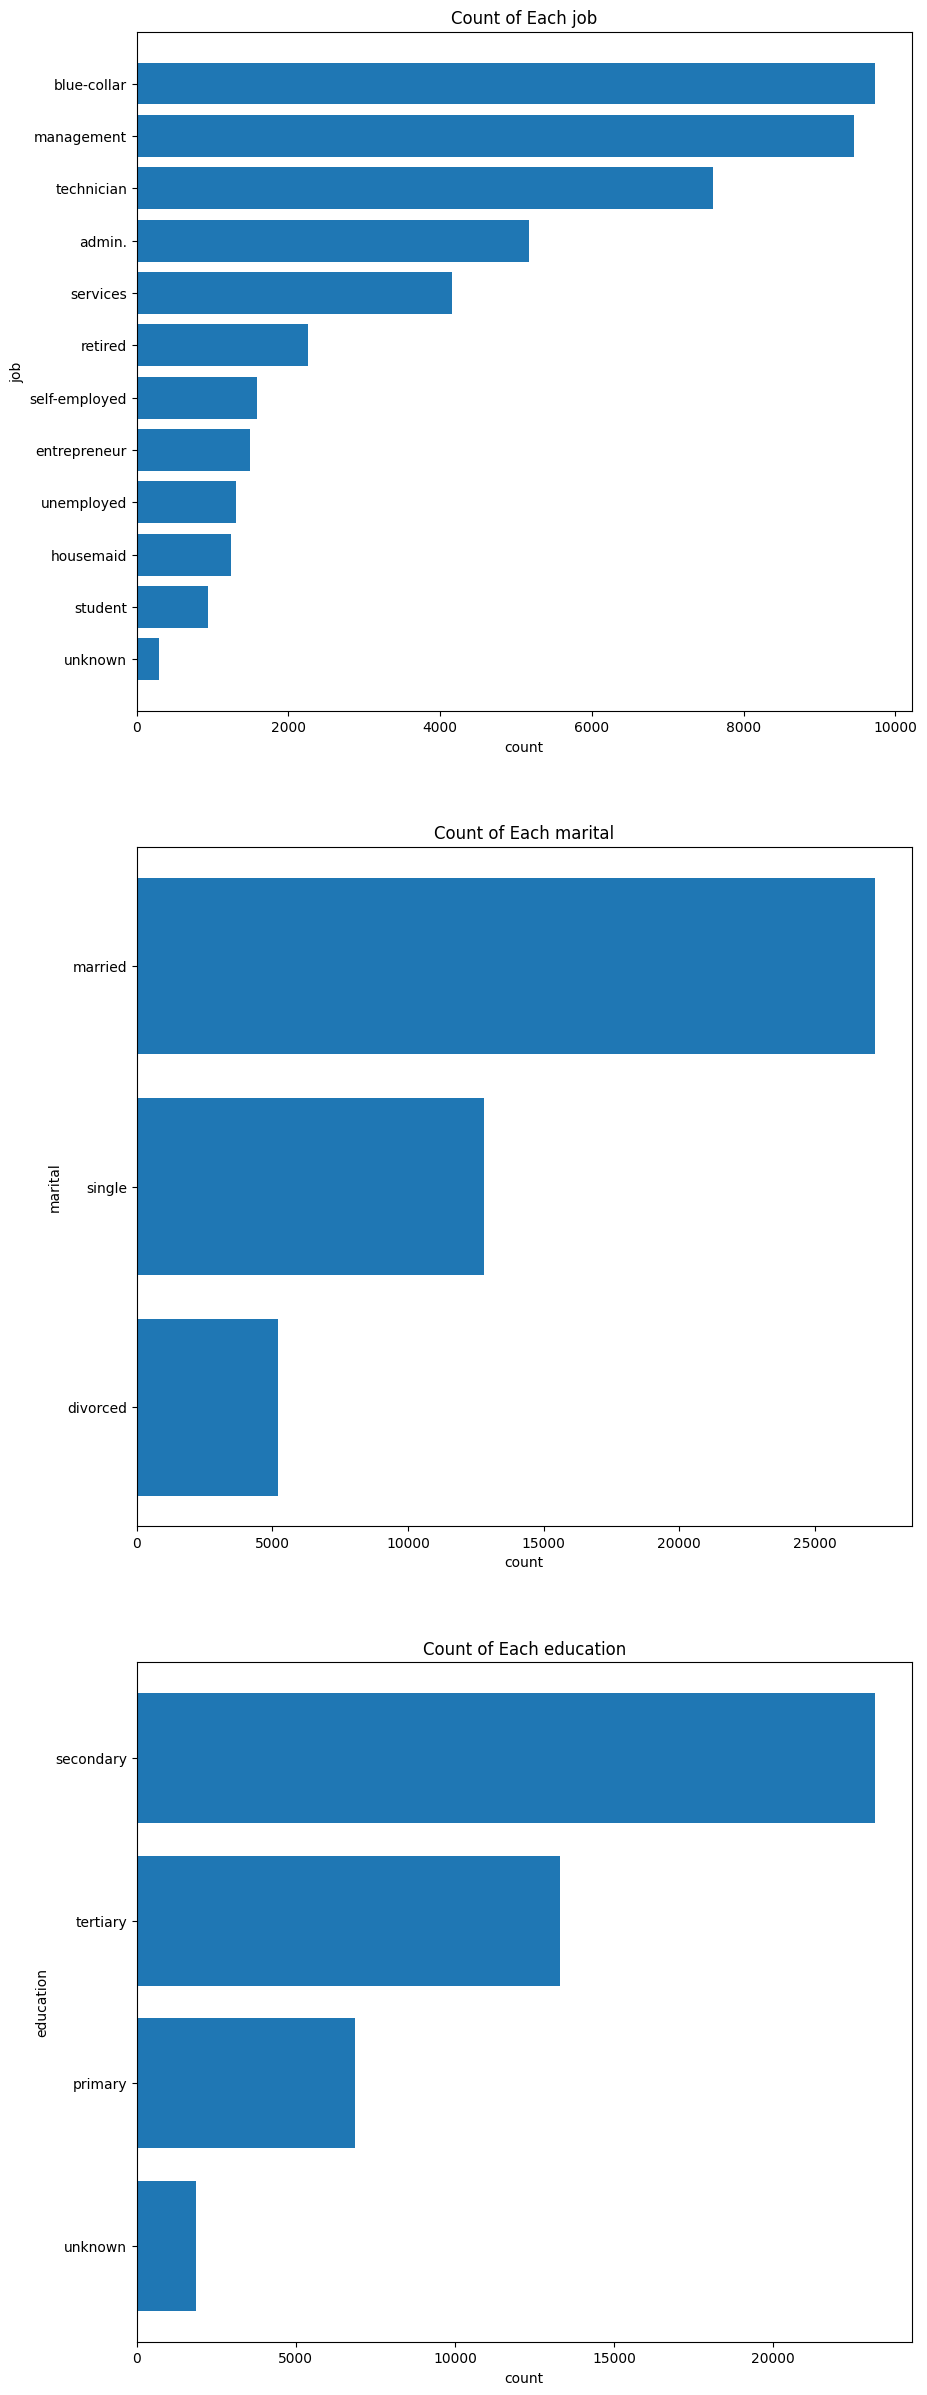

In [15]:
fig, ax = plt.subplots(3, 1,figsize=(10,30))
list_fields = ['job', 'marital', 'education']
for index, var in enumerate(list_fields):
    field = df[var].value_counts().reset_index().sort_values(by="count")
    ax[index].barh(field[var], field['count'])
    ax[index].set_title(f"Count of Each {var}")
    ax[index].set(xlabel="count", ylabel=var)
plt.show()


Построим диаграммы показывающее соотношение выполнение обязательств, а так же наличие кредитов

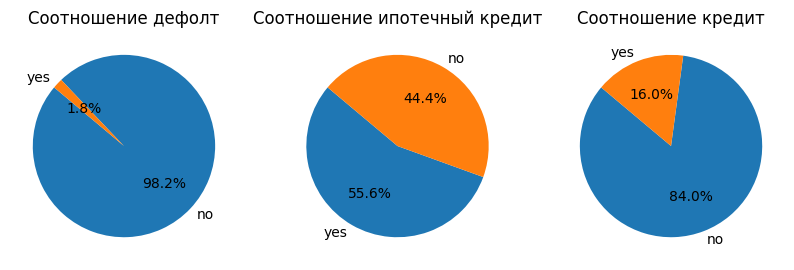

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
credits = ['default', 'housing', 'loan']
for index, var in enumerate(credits):
    field = df[var].value_counts().reset_index()
    ax[index].pie(field['count'], labels=field[var], autopct='%1.1f%%', startangle=140)
    ax[index].set_title(f"Соотношение {russian_labels[var]}")
plt.show()

Построим диаграммы показывающие результаты предыдущей маркетинговой компании

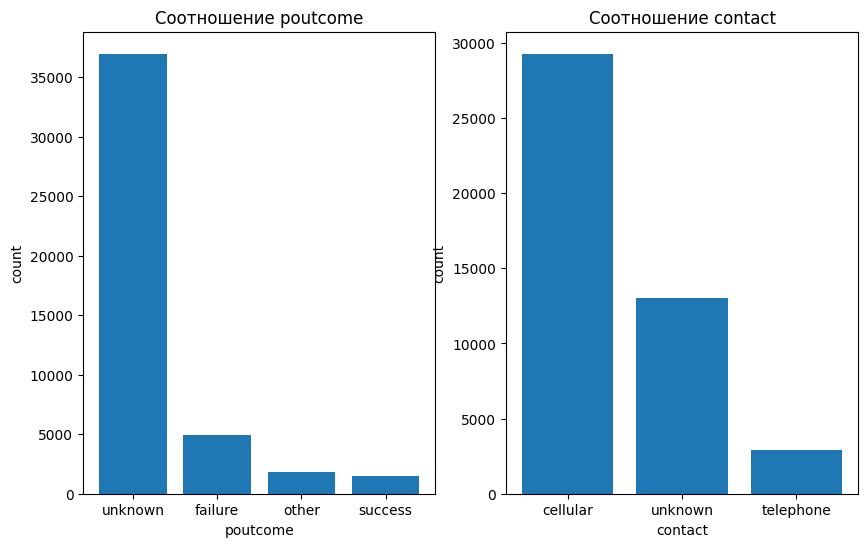

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
previous_campaign = ['poutcome', 'contact']
for index, var in enumerate(previous_campaign):
    field = df[var].value_counts().reset_index()
    ax[index].bar(field[var], field["count"])
    ax[index].set_title(f"Соотношение {var}")
    ax[index].set(ylabel="count", xlabel=var)
plt.show()

<Axes: xlabel='month'>

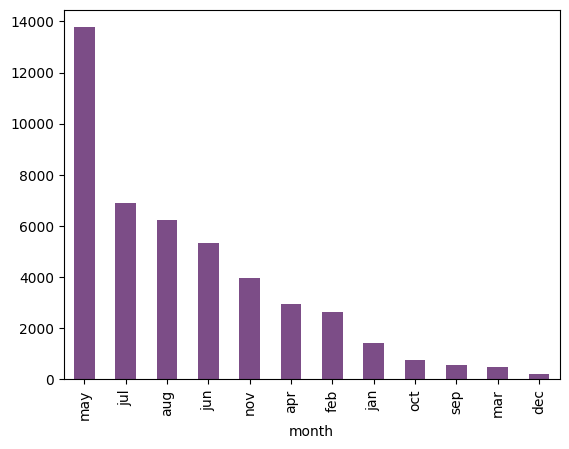

In [18]:
df['month'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

## Построение модели

Исходя из проведенного исследования можно сказать, что атрибуты `poutcome`, `previous`, `pdays` и `default` не являются значительными, следовательно их можно опустить.

In [19]:
# Удаляем не информативные таблицы
df.drop(columns=['poutcome', 'previous', 'pdays', 'default'], inplace=True)
df.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58    management  married   tertiary     2143     yes   no  unknown    5   
1   44    technician   single  secondary       29     yes   no  unknown    5   
2   33  entrepreneur  married  secondary        2     yes  yes  unknown    5   
3   47   blue-collar  married    unknown     1506     yes   no  unknown    5   
4   33       unknown   single    unknown        1      no   no  unknown    5   

  month  duration  campaign   y  
0   may       261         1  no  
1   may       151         1  no  
2   may        76         1  no  
3   may        92         1  no  
4   may       198         1  no

In [20]:
to_encode = ['job', 'marital', 'education', 'contact', 'month', 'loan', 'housing']

data_encoded = pd.get_dummies(df, columns=to_encode)
label_encoder = LabelEncoder()
data_encoded['y'] = label_encoder.fit_transform(df['y'])

data_encoded.head()

age  balance  day  duration  campaign  y  job_admin.  job_blue-collar  \
0   58     2143    5       261         1  0       False            False   
1   44       29    5       151         1  0       False            False   
2   33        2    5        76         1  0       False            False   
3   47     1506    5        92         1  0       False             True   
4   33        1    5       198         1  0       False            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ...      False      False       True   
2              True          False  ...      False      False       True   
3             False          False  ...      False      False       True   
4             False          False  ...      False      False       True   

   month_nov  month_oct  month_sep  loan_no  loan_yes  housing_no  housing_yes  
0      False      False      False     True     False       False         True  
1      False      False      False     True     False       False         True  
2      False      False      False    False      True       False         True  
3      False      False      False     True     False       False         True  
4      False      False      False     True     False        True        False  

[5 rows x 44 columns]

In [21]:
X = data_encoded.drop(columns=['y'], axis=1)
Y = data_encoded['y']

In [22]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [26]:
dt_classifier =DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(X_train, Y_train)
y_pred = dt_classifier.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(Y_train, y_pred)

1.0

In [27]:
y_pred = dt_classifier.predict_proba(x_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred)

0.6798925426989065

In [28]:
dt_classifier =DecisionTreeClassifier(max_depth=1, criterion='entropy')
dt_classifier.fit(X_train, Y_train)
y_pred = dt_classifier.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(Y_train, y_pred)

0.7045695978378969

In [29]:
y_pred = dt_classifier.predict_proba(x_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred)

0.6995314577658436

In [58]:
dt_classifier =DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, criterion='entropy')
dt_classifier.fit(X_train, Y_train)
y_pred = dt_classifier.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(Y_train, y_pred)

0.8827845654789215

In [59]:
y_pred = dt_classifier.predict_proba(x_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred)

0.866436128226739

[Text(0.5075, 0.9285714285714286, 'x[3] <= 389.5\nentropy = 0.518\nsamples = 36168\nvalue = [31970, 4198]'),
 Text(0.26875, 0.7857142857142857, 'x[26] <= 0.5\nentropy = 0.346\nsamples = 29622\nvalue = [27702.0, 1920.0]'),
 Text(0.38812499999999994, 0.8571428571428572, 'True  '),
 Text(0.1275, 0.6428571428571429, 'x[3] <= 130.5\nentropy = 0.434\nsamples = 21025\nvalue = [19150, 1875]'),
 Text(0.055, 0.5, 'x[3] <= 77.5\nentropy = 0.147\nsamples = 8973\nvalue = [8784, 189]'),
 Text(0.03, 0.35714285714285715, 'x[4] <= 3.5\nentropy = 0.038\nsamples = 3995\nvalue = [3979.0, 16.0]'),
 Text(0.02, 0.21428571428571427, 'x[3] <= 62.5\nentropy = 0.057\nsamples = 2440\nvalue = [2424, 16]'),
 Text(0.01, 0.07142857142857142, 'entropy = 0.027\nsamples = 1495\nvalue = [1491, 4]'),
 Text(0.03, 0.07142857142857142, 'entropy = 0.098\nsamples = 945\nvalue = [933, 12]'),
 Text(0.04, 0.21428571428571427, 'entropy = 0.0\nsamples = 1555\nvalue = [1555, 0]'),
 Text(0.08, 0.35714285714285715, 'x[34] <= 0.5\nentr

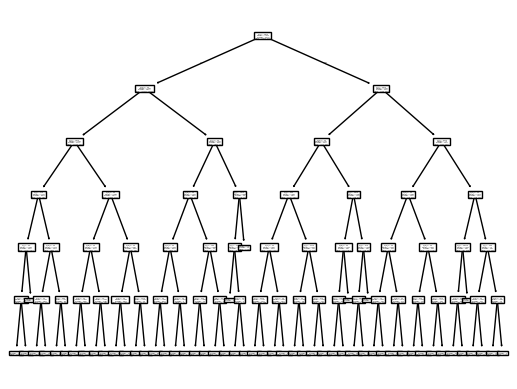

In [60]:
tree.plot_tree(dt_classifier, )